# Fully connected Neural network in KERAS

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np

In [47]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## CNN Architeacture

In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
___________________________

In [49]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.9367 - acc: 0.8830 - val_loss: 0.0661 - val_acc: 0.9797
Epoch 2/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.1080 - acc: 0.9688 - val_loss: 0.0492 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0774 - acc: 0.9770 - val_loss: 0.0446 - val_acc: 0.9865
Epoch 4/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0630 - acc: 0.9816 - val_loss: 0.0386 - val_acc: 0.9882
Epoch 5/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0528 - acc: 0.9845 - val_loss: 0.0397 - val_acc: 0.9884
Epoch 6/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0451 - acc: 0.9865 - val_loss: 0.0337 - val_acc: 0.9896
Epoch 7/12
60000/60000 [==============================] - 174s 3ms/step - 

In [45]:
mycnn.input_shape

(None, 28, 28, 1)

In [46]:
train_data.shape

(60000, 28, 28, 1)

## Reading image into python env.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import color
from skimage import io
from skimage.color import rgb2gray
import cv2 as cv

%matplotlib inline

In [0]:
img = cv.imread('SoftmaxLayer.png')

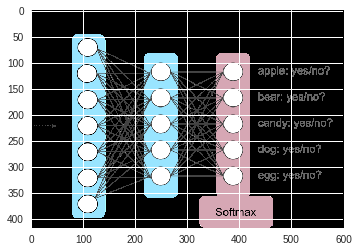

In [55]:
plt.imshow(img)

## Sentument Analysis with IMDB

In [0]:
import numpy as np
import keras as k
import tensorflow as tf
from keras.models import load_model
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [58]:
np.random.seed(1)
tf.set_random_seed(1)



max_words = 50000

(xtrain, ytrain), (xtest, ytest) = k.datasets.imdb.load_data(seed =1, num_words = max_words)

17465344/17464789 [==============================] - 0s 0us/step


## Preprocssing:


*   Convert everything into lower-case.
*   Remove all punctuation characters. (except single case)
*



In [0]:
max_review_len = 180

xtrain = k.preprocessing.sequence.pad_sequences(xtrain, truncating = 'pre', padding = 'pre', maxlen = max_review_len)

xtest = k.preprocessing.sequence.pad_sequences(xtest, truncating = 'pre', padding = 'pre', maxlen = max_review_len)

In [0]:
def mylstm(act_func):
  print('Creating Deep LSTM model with activation function = ', act_func)
  e_init = k.initializers.RandomUniform(-0.01, 0.01, seed =1)
  init = k.initializers.glorot_uniform(seed = 1)
  simple_adam = k.optimizers.Adam()
  embed_vec_len = 180 # values per word -- 100-500 is typical
  
  model = k.Sequential()
  model.add(k.layers.embeddings.Embedding(input_dim = max_words, output_dim = embed_vec_len, embeddings_initializer = e_init, mask_zero = True))
  model.add(k.layers.LSTM(units = 100, kernel_initializer = init, dropout = 0.2, recurrent_dropout = 0.2))
  
  model.add(k.layers.Dense(units = 1, kernel_initializer = init, activation = act_func))
  
  model.compile(loss = 'binary_crossentropy', optimizer = simple_adam, metrics = ['acc'])
  
  return model

In [63]:
siglstm = mylstm('sigmoid')
relstm = mylstm('relu')
softlstm = mylstm('softmax')


Creating Deep LSTM model with activation function =  sigmoid
Creating Deep LSTM model with activation function =  relu
Creating Deep LSTM model with activation function =  softmax


In [64]:
siglstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 180)         9000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               112400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 9,112,501
Trainable params: 9,112,501
Non-trainable params: 0
_________________________________________________________________


In [66]:
bat_size = 32

siglstm.fit(xtrain, ytrain, epochs = 4,batch_size =  bat_size, verbose = 1)

Epoch 1/4
25000/25000 [==============================] - 439s 18ms/step - loss: 0.3938 - acc: 0.8294
Epoch 2/4
25000/25000 [==============================] - 441s 18ms/step - loss: 0.2623 - acc: 0.8980
Epoch 3/4
25000/25000 [==============================] - 444s 18ms/step - loss: 0.1782 - acc: 0.9351
Epoch 4/4
25000/25000 [==============================] - 438s 18ms/step - loss: 0.1124 - acc: 0.9607


In [0]:
loss_acc = siglstm.evaluate(xtest, ytest, verbose = 1)

print('Test Data: loss = %0.6f accuracy = %0.2f%%' % (loss_acc[0], loss_acc[1]*100))

In [0]:
d = k.datasets.imdb.get_word_index()

review = 'that was awfully smart'

words = review.split()
review = []
for word in words:
  if word not in d:
    review.append(2)
    
  else:
    review.append(d[word]+3)
    
review = k.preprocessing.sequence.pad_sequences([review], truncating = 'pre', padding = 'pre', maxlen = max_review_len)



In [72]:
siglstm.predict(review)

array([[0.04344685]], dtype=float32)

[CIFAR-10 tutorail](https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)